In [49]:
% some housekeeping stuff
register_graphics_toolkit ("gnuplot");
%available_graphics_toolkits ();
graphics_toolkit ("gnuplot")
clear
%warning off
format short e
% end of housekeeping

# Strong-Strong Titrations and Buffering

If you start with 0.01 M hydrochloric acid the initial pH will be 2 (-log(0.01)=2).  As you add strong base the pH will increase.  Neutralizing the acid in this way is called titration.  At any point during the titration the charge balance must be satisfied ...

$[\mathrm{H}^+]+[\mathrm{Na}^+]=[\mathrm{OH}^-]+[\mathrm{Cl}^-]$

Using K$_w$ we can write this in terms of H+ and $\mathrm{Cl_T}$

$[\mathrm{H}^+]+[\mathrm{Na}^+]=\dfrac{K_w}{[\mathrm{H}^+]}+\mathrm{Cl_T}$

We can assume that the concentration of the added base is high enough that we can ignore dilution so $[\mathrm{Cl}^-]$ = $\mathrm{Cl_T}$= 0.01 M, for the entire titration (if we knew the volumes we could calculate the exact concentration of this strong acid anion, but I am trying to keep the calculations simple and illustrate the principles of titration and buffering, and electroneutrality).  

So with total chloride known we have just two variables, the sodium concentration and the proton concentration.  If we set one variable we have one equation and one unknown and we can solve it.  To make a graph of the pH versus added sodium it is actually easier to fix pH ($[\mathrm{H}^+]$) and solve for $[\mathrm{Na}^+]$. So by rearranging the electroneutrality we can write 

$[\mathrm{Na}^+]=\dfrac{K_w}{[\mathrm{H}^+]}+[\mathrm{Cl}^-]-[\mathrm{H}^+]$

In the code below we'll do this calculation and plot the titration curve

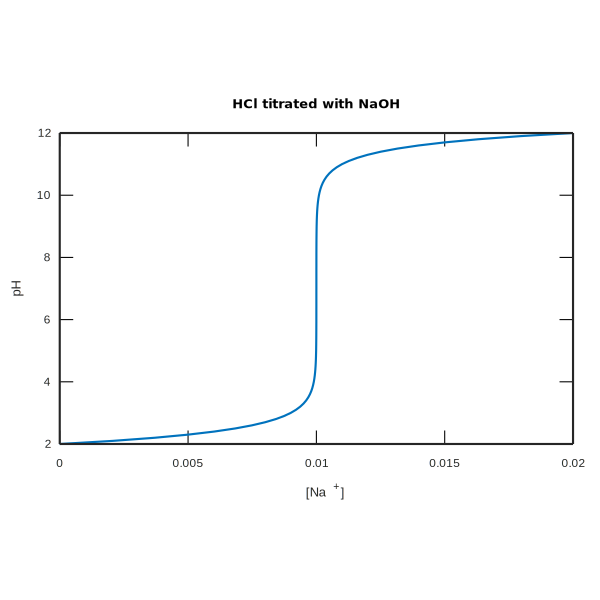

In [50]:
Kw=1e-14; pH=2:0.1:12; H=10.^-pH; OH=Kw./H; ClT=0.01;
Na=OH+ClT-H;
plot(Na,pH,'linewidth',2); xlabel('[Na^+]'); ylabel('pH')
set(gca,'fontsize',11,'linewidth',2)
title('HCl titrated with NaOH')

Of course we can determine the concentratation of chloride and sodium cation for any volume addition and determine the titration curve in that way


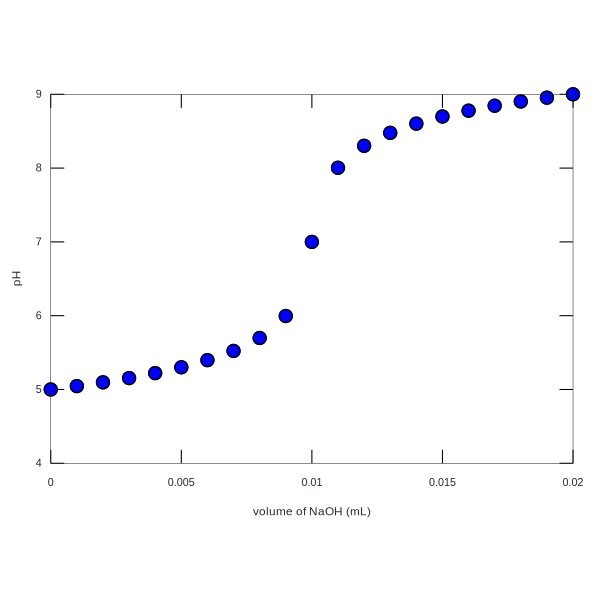

In [51]:
pH=[]; % reset pH variable
V=0.1000; % initial volume in L
Clconci=0.00001; %initial chloride conc in mol/L
Nastockconc=0.1; %stock conc (buret) of NaOH 

Ve=(Clconci*V)/Nastockconc; % determine equivalence point volume

Vadd=0:Ve/10:2*Ve; %volume added in L, from 0 in steps of 1 mL (0.001 L) to 20 mL added (0.02 L)

ClT=(Clconci*V)./(V+Vadd); % corrects chloride for dilution.  those initial number of moles divided by the increasing volume

NaT=(Nastockconc*Vadd)./(V+Vadd); %conc of sodium at any point in the titration

for i=1:length(Vadd)
    a=1; b=NaT(i)-ClT(i); c=-Kw;
    t=roots([a b c]); %finds the roots
    t=t(imag(t)==0); %sets any imaginary roots to zero
    % display the positive real root
    t=t(t>0);
    pH(i)=-log10(t);
end

plot(Vadd*1000,pH,'ko','markersize',4,'markerfacecolor','b')
xlabel('volume of NaOH (mL)'); ylabel('pH')

